In [3]:
import pandas as pd
df = pd.read_excel('角色数据.xlsx')···

,人物,生命值上限,生命值上限加成,攻击力,攻击力加成,防御力,防御力加成,元素精通,暴击率（%）,暴击伤害（%）,治疗加成（%）,元素充能效率（%）,火元素伤害加成（%）,水元素伤害加成（%）,草元素伤害加成（%）,雷元素伤害加成（%）,风元素伤害加成(%),冰元素伤害加成（%）,岩元素伤害加成 （%）,物理伤害加成 （%）
0,琴,13662,8126,671,1457,715,306,146,18.1,55.0,22.2,120.0,0,0,0,0,0,0,0,0
1,流浪者,8968,8575,879,1123,536,137,58,73.1,109.6,0.0,115.5,0,0,0,0,15,0,0,0


简单测算一下，散兵可以造成的伤害

伤害公式：攻击力* 技能倍率 * （元素加成+武器被动加成+伤害提升buff) * 反应倍数 * （元素精通加成和套装反应系数加成） * （1+爆伤%）

普通攻击     一段伤害：99.9%

            二段伤害：94.5%

            三段伤害：69.3%+69.3%

            重击伤害：184.9%

E技能：     技能伤害：133.3%

            普通攻击：143.5% 普通攻击伤害

            重击：134.8% 重击伤害

Q技能：     206.1%*5

扩散伤害提升45.3%

圣遗物套装：沙上楼阁四件

武器：铃铛（lv80，精炼一阶）普攻造成的伤害14秒内每秒提升4.8%，击中敌人后普攻造成的伤害提升9.6%。至多普攻伤害提升48%

无暴击的普攻123和重击伤害(假设击中敌人)


In [42]:
import math
w_attack = df['攻击力'].loc[df.index[1]]+df['攻击力加成'].loc[df.index[1]]
wind_dmg = 1+0.15

n_attack_1 = math.floor(w_attack*0.999*(1+0.096)*wind_dmg)
n_attack_2= math.floor(w_attack*0.945*(1+0.096)*wind_dmg)
n_attack_3 = math.floor(2*(w_attack*0.693*(1+0.096))*wind_dmg)
charged = math.floor(w_attack*1.849*wind_dmg)
print(n_attack_1, n_attack_2, n_attack_3, charged)

2520 2384 3497 4256


散兵暴击后普攻123和重击伤害

In [43]:
w_attack = df['攻击力'].loc[df.index[1]]+df['攻击力加成'].loc[df.index[1]]

n_attack_1_crit = math.floor(w_attack*0.999*(1+df['暴击伤害（%）'].loc[df.index[1]]/100)*(1+0.096)*wind_dmg)
n_attack_2_crit= math.floor(w_attack*0.945*(1+df['暴击伤害（%）'].loc[df.index[1]]/100)*(1+0.096)*wind_dmg)
n_attack_3_crit = math.floor(2*(w_attack*0.693*(1+df['暴击伤害（%）'].loc[df.index[1]]/100)*(1+0.096))*wind_dmg)
charged_crit = math.floor(w_attack*1.849*(1+df['暴击伤害（%）'].loc[df.index[1]]/100)*wind_dmg)
print(n_attack_1_crit, n_attack_2_crit, n_attack_3_crit, charged_crit)

5283 4997 7330 8922


重击后15秒内，普通攻击和重击提升的伤害（无暴击）

In [44]:
p = 1+0.4
print(math.floor(n_attack_1*p), math.floor(n_attack_2*p), math.floor(n_attack_3*p), math.floor(charged*p))

3528 3337 4895 5958


重击后15秒内，普通攻击和重击提升的伤害（暴击）

In [45]:
print(math.floor(n_attack_1_crit*p), math.floor(n_attack_2_crit*p), math.floor(n_attack_3_crit*p), math.floor(charged_crit*p))

7396 6995 10262 12490


In [46]:
n_attack_1_7 = math.floor(w_attack*1.087*(1+0.096)*wind_dmg)
n_attack_2_7= math.floor(w_attack*1.028*(1+0.096)*wind_dmg)
n_attack_3_7 = math.floor(2*(w_attack*0.753*(1+0.096))*wind_dmg)
charged_7 = math.floor(w_attack*1.981*wind_dmg)
print(n_attack_1_7, n_attack_2_7, n_attack_3_7, charged_7)

2742 2593 3800 4560


In [47]:
n_attack_1_8 = math.floor(w_attack*1.175*(1+0.096)*wind_dmg)
n_attack_2_8= math.floor(w_attack*1.111*(1+0.096)*wind_dmg)
n_attack_3_8 = math.floor(2*(w_attack*0.814*(1+0.096))*wind_dmg)
charged_8 = math.floor(w_attack*2.113*wind_dmg)
print(n_attack_1_8, n_attack_2_8, n_attack_3_8, charged_8)

2964 2803 4107 4864


In [48]:
n_attack_1_9 = math.floor(w_attack*1.262*(1+0.096)*wind_dmg)
n_attack_2_9= math.floor(w_attack*1.195*(1+0.096)*wind_dmg)
n_attack_3_9 = math.floor(2*(w_attack*0.875*(1+0.096))*wind_dmg)
charged_9 = math.floor(w_attack*2.245*wind_dmg)
print(n_attack_1_9, n_attack_2_9, n_attack_3_9, charged_9)

3184 3015 4415 5168


In [49]:
n_attack_1_10 = math.floor(w_attack*1.358*(1+0.096)*wind_dmg)
n_attack_2_10= math.floor(w_attack*1.285*(1+0.096)*wind_dmg)
n_attack_3_10 = math.floor(2*(w_attack*0.942*(1+0.096))*wind_dmg)
charged_10 = math.floor(w_attack*2.377*wind_dmg)
print(n_attack_1_10, n_attack_2_10, n_attack_3_10, charged_10)

3426 3242 4753 5472


Text(0.5, 1.0, '散兵普攻重击伤害')

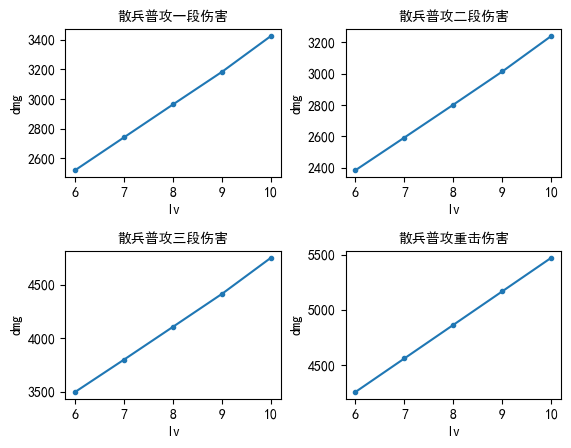

In [82]:
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['figure.subplot.wspace'] = 0.3
plt.rcParams['figure.subplot.hspace'] = 0.5

x = [6, 7, 8, 9, 10]
y1 = [n_attack_1, n_attack_1_7, n_attack_1_8, n_attack_1_9, n_attack_1_10]
y2 = [n_attack_2, n_attack_2_7, n_attack_2_8, n_attack_2_9, n_attack_2_10]
y3 = [n_attack_3, n_attack_3_7, n_attack_3_8, n_attack_3_9, n_attack_3_10]
y4 = [charged, charged_7, charged_8, charged_9, charged_10]

plt.subplot(2,2,1)
plt.plot(x, y1, '.-')
plt.xlabel('lv')
plt.ylabel('dmg')
plt.title('散兵普攻一段伤害')
plt.subplot(2,2,2)
plt.xlabel('lv')
plt.ylabel('dmg')
plt.plot(x,y2, '.-')
plt.title('散兵普攻二段伤害')

plt.subplot(2,2,3)
plt.plot(x,y3, '.-')
plt.xlabel('lv')
plt.ylabel('dmg')
plt.title('散兵普攻三段伤害')

plt.subplot(2,2,4)
plt.plot(x,y4, '.-')
plt.xlabel('lv')
plt.ylabel('dmg')
plt.title('散兵普攻重击伤害')

In [80]:
slope_1 = (n_attack_1_10-n_attack_1)/5
slope_2 = (n_attack_2_10-n_attack_2)/5
slope_3 = (n_attack_3_10-n_attack_3)/5
slope_c = (charged_10-charged)/5

slope_1 = math.floor(slope_1)
slope_2 = math.floor(slope_2)
slope_3 = math.floor(slope_3)
slope_c = math.floor(slope_c)

print(slope_1, slope_2, slope_3, slope_c)

181 171 251 243


目前的角色属性：
每升一级一段伤害平均增加181.2， 二段伤害增加171， 三段增加251， 四段增加243
